In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

### Input data

In [2]:
data = pd.read_table("data/obj_pose-laser-radar-synthetic-input.txt", header=None, index_col=None, engine='python')
radar_data = data[data.index == 'R']
radar_data.columns = ['rho', 'phi', 'rho_d', 'timestamp', 'p_x (GT)', 'p_y (GT)','v_x (GT)', 'v_y (GT)', 'yaw (GT)', 'yaw_d (GT)']
radar_data.head()

,rho,phi,rho_d,timestamp,p_x (GT),p_y (GT),v_x (GT),v_y (GT),yaw (GT),yaw_d (GT)
R,1.014892,0.554329,4.892807,1.477010e+15,0.859997,0.600045,5.199747,0.001797,0.000346,0.013822
R,1.047505,0.389240,4.511325,1.477010e+15,1.379955,0.600629,5.198979,0.010778,0.002073,0.027634
R,1.698300,0.298280,5.209986,1.477010e+15,1.899823,0.602470,5.197661,0.026932,0.005182,0.041430
R,2.044382,0.276002,5.043867,1.477010e+15,2.419540,0.606284,5.195728,0.050239,0.009669,0.055199
R,2.990916,0.217668,5.191807,1.477010e+15,2.939043,0.612786,5.193090,0.080668,0.015532,0.068933


#### Radar data

Below is the table of succesive differences in rows. 

Time interval is 0.1 seconds

Max. acceleration = (0.25 m/s)/(0.1 s) = 2.5 m/s^2
Standard deviation = (0.13 m/s)/(0.1 s) = 1.3 m/s^2

Max yaw_dd = (0.013 rad/s)/(0.1 s) = 0.13 rad/s^2
Standard deviation = (0.01 rad/s)/(0.1 s) = 0.1 rad/s^2

In [3]:
radar_data.diff().describe()

,rho,phi,rho_d,timestamp,p_x (GT),p_y (GT),v_x (GT),v_y (GT),yaw (GT),yaw_d (GT)
count,249.000000,249.000000,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.049214,0.006456,-0.029311,100000.0,-0.031485,0.041391,0.000001,-0.000007,-0.000001,-0.000056
std,0.538315,0.567372,0.448318,0.0,0.373180,0.330331,0.133251,0.137516,0.039047,0.009774
min,-1.310340,-6.306025,-1.232496,100000.0,-0.487800,-0.490958,-0.255819,-0.244519,-0.054997,-0.013822
25%,-0.309570,-0.027218,-0.339795,100000.0,-0.366041,-0.279877,-0.093913,-0.117121,-0.038890,-0.009712
50%,0.032613,0.001285,-0.048635,100000.0,-0.178747,0.077520,0.000255,0.000790,-0.000345,0.000000
75%,0.418700,0.038976,0.251358,100000.0,0.394410,0.343062,0.093848,0.117818,0.038890,0.009712
max,1.574950,6.279407,1.139243,100000.0,0.519984,0.483243,0.256015,0.244405,0.054998,0.013822


In [4]:
data = pd.read_table("data/obj_pose-laser-radar-synthetic-input.txt", header=None, index_col=None, engine='python')
lidar_data = data[data.index == 'L']
del lidar_data[9]
lidar_data.columns = ['p_x', 'p_y', 'timestamp', 'p_x (GT)', 'p_y (GT)','v_x (GT)', 'v_y (GT)', 'yaw (GT)', 'yaw_d (GT)']
lidar_data.head()

,p_x,p_y,timestamp,p_x (GT),p_y (GT),v_x (GT),v_y (GT),yaw (GT),yaw_d (GT)
L,0.312243,0.580340,1.477010e+15,0.600000,0.600000,5.199937,0.000000,0.000000,0.006911
L,1.173848,0.481073,1.477010e+15,1.119984,0.600225,5.199429,0.005390,0.001037,0.020730
L,1.650626,0.624690,1.477010e+15,1.639904,0.601347,5.198392,0.017960,0.003455,0.034535
L,2.188824,0.648739,1.477010e+15,2.159704,0.604085,5.196776,0.037693,0.007253,0.048318
L,2.655256,0.665980,1.477010e+15,2.679323,0.609155,5.194504,0.064565,0.012429,0.062071


#### Lidar data

Below is the table of succesive differences in rows. 

Time interval is 0.1 seconds

Max. acceleration = (0.25 m/s)/(0.1 s) = 2.5 m/s^2
Standard deviation = (0.13 m/s)/(0.1 s) = 1.3 m/s^2

Max yaw_dd = (0.013 rad/s)/(0.1 s) = 0.13 rad/s^2
Standard deviation = (0.01 rad/s)/(0.1 s) = 0.1 rad/s^2

In [5]:
lidar_data.diff().describe()

,p_x,p_y,timestamp,p_x (GT),p_y (GT),v_x (GT),v_y (GT),yaw (GT),yaw_d (GT)
count,249.000000,249.000000,249.0,249.000000,249.000000,2.490000e+02,249.000000,249.000000,249.000000
mean,-0.029994,0.041103,100000.0,-0.031485,0.041391,-2.318538e-17,0.000007,0.000001,-0.000056
std,0.427966,0.385834,0.0,0.373180,0.330331,1.332509e-01,0.137516,0.039047,0.009774
min,-0.868010,-0.943185,100000.0,-0.487810,-0.490958,-2.559085e-01,-0.244557,-0.054998,-0.013823
25%,-0.364868,-0.250941,100000.0,-0.366042,-0.279880,-9.376200e-02,-0.117854,-0.038890,-0.009835
50%,-0.115064,0.104070,100000.0,-0.178747,0.077525,-5.080000e-04,-0.000584,0.000345,-0.000174
75%,0.320483,0.337480,100000.0,0.394410,0.343062,9.406800e-02,0.117077,0.038890,0.009588
max,1.167504,0.826505,100000.0,0.519984,0.483240,2.559368e-01,0.244376,0.054997,0.013818


### Output data

#### NIS for radar :

In [6]:
data = pd.read_table("output/out.txt")
data.head()

,time_stamp,px_state,py_state,v_state,yaw_angle_state,yaw_rate_state,sensor_type,NIS,px_measured,py_measured,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth
0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000e+00,lidar,2.242090e-314,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000
1,1477010443050000,0.757365,0.653870,7.21476,-4.502470e-17,2.194340e-17,radar,7.459530e+01,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
2,1477010443100000,1.153040,0.504923,7.22267,-2.190410e-01,-2.041710e-02,lidar,3.644120e-01,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390
3,1477010443150000,1.258930,0.540987,7.19734,2.763970e-02,2.222520e-02,radar,1.896200e+00,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
4,1477010443200000,1.620870,0.581628,7.20210,9.129940e-02,5.024520e-02,lidar,2.157110e-01,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960


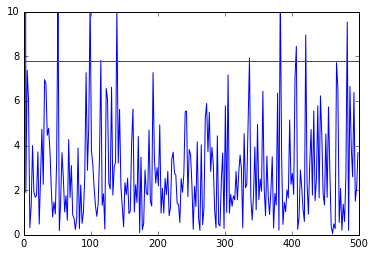

In [7]:
plt.plot(data[data.sensor_type == 'radar']['NIS'])
plt.ylim(0,10)
plt.axhline(7.8, c='red')

In [8]:
print "95% quartile : {}".format(data[data.sensor_type == 'radar']['NIS'].quantile(.95))
data[data.sensor_type == 'radar']['NIS'].describe()

95% quartile : 7.2647975


count    250.000000
mean       3.116559
std        5.063096
min        0.043286
25%        1.268515
50%        2.182115
75%        3.872203
max       74.595300
Name: NIS, dtype: float64

#### NIS for lidar : 

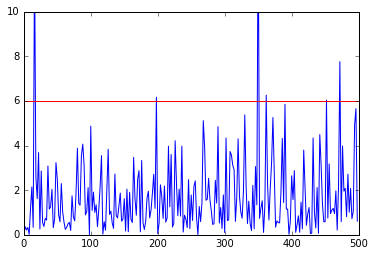

In [9]:
plt.plot(data[data.sensor_type == 'lidar']['NIS'])
plt.ylim(0,10)
plt.axhline(6, c='red')

In [10]:
print "95% quartile : {}".format(data[data.sensor_type == 'lidar']['NIS'].quantile(.95))
data[data.sensor_type == 'lidar']['NIS'].describe()

95% quartile : 4.858247


count     2.500000e+02
mean      1.735853e+00
std       1.788005e+00
min      2.242090e-314
25%       5.845780e-01
50%       1.185970e+00
75%       2.275593e+00
max       1.447050e+01
Name: NIS, dtype: float64